In [1]:
#!pip install jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
%%notify
import codecs
import glob
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


<IPython.core.display.Javascript object>

In [3]:
#nltk.download()

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
book_filenames= sorted(glob.glob('../datatextml/*/*.txt'))
print(book_filenames)

['../datatextml\\bible\\1954_TL_djvu.txt', '../datatextml\\bible\\1974_TB_djvu.txt', '../datatextml\\bible\\2008_MILT_djvu.txt', '../datatextml\\cerpen\\Aisyah untuk Faaris.txt', '../datatextml\\cerpen\\Aku, Kamu, dan Sahabatku !.txt', '../datatextml\\cerpen\\Apakah Aku Sendiri.txt', '../datatextml\\cerpen\\Ayahku dimana.txt', '../datatextml\\cerpen\\Bertemu3PocongIdiot.txt', '../datatextml\\cerpen\\Cara Mudah Terbebas Dari Jeratan Hutang.txt', '../datatextml\\cerpen\\CerpenAdaApaDenganTradisi.txt', '../datatextml\\cerpen\\CerpenAkuBukanSitiNurbaya.txt', '../datatextml\\cerpen\\CerpenBalitaBertunangan.txt', '../datatextml\\cerpen\\CerpenBerjalanMenjalani.txt', '../datatextml\\cerpen\\CerpenBukanSekedarKencingBiasa.txt', '../datatextml\\cerpen\\CerpenBungaBusuk.txt', '../datatextml\\cerpen\\CerpenBusGaibkaryaKenHanggara.txt', '../datatextml\\cerpen\\CerpenCaraMatiyangSulitDipercayakaryaKenHanggara.txt', '../datatextml\\cerpen\\CerpenCintaRemajaSingkatDoaSepasangKekasih.txt', '../datatex

In [13]:
%%notify
corpus_raw = u''
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    try:
        with codecs.open(book_filename,"r", encoding="utf8") as book_file:
            corpus_raw += book_file.read()
    except Exception as e:
        print("Error reading", book_filename, e)
        pass
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '../datatextml\bible\1954_TL_djvu.txt'...
Corpus is now 5591608 characters long

Reading '../datatextml\bible\1974_TB_djvu.txt'...
Corpus is now 10698216 characters long

Reading '../datatextml\bible\2008_MILT_djvu.txt'...
Corpus is now 16087654 characters long

Reading '../datatextml\cerpen\Aisyah untuk Faaris.txt'...
Error reading ../datatextml\cerpen\Aisyah untuk Faaris.txt 'utf-8' codec can't decode byte 0x93 in position 505: invalid start byte
Corpus is now 16087654 characters long

Reading '../datatextml\cerpen\Aku, Kamu, dan Sahabatku !.txt'...
Error reading ../datatextml\cerpen\Aku, Kamu, dan Sahabatku !.txt 'utf-8' codec can't decode byte 0x93 in position 28: invalid start byte
Corpus is now 16087654 characters long

Reading '../datatextml\cerpen\Apakah Aku Sendiri.txt'...
Error reading ../datatextml\cerpen\Apakah Aku Sendiri.txt 'utf-8' codec can't decode byte 0xa0 in position 85: invalid start byte
Corpus is now 16087654 characters long

Reading '../datatextml\cerpen

Corpus is now 16169401 characters long

Reading '../datatextml\cerpen\CerpenWarisanTerakhirKolektorGigikaryaKenHanggara.txt'...
Corpus is now 16177736 characters long

Reading '../datatextml\cerpen\Cinta Pertama (Eps.2).txt'...
Error reading ../datatextml\cerpen\Cinta Pertama (Eps.2).txt 'utf-8' codec can't decode byte 0xa0 in position 5491: invalid start byte
Corpus is now 16177736 characters long

Reading '../datatextml\cerpen\Cinta Pertama (Eps.3).txt'...
Corpus is now 16225665 characters long

Reading '../datatextml\cerpen\Cinta Pertama .txt'...
Error reading ../datatextml\cerpen\Cinta Pertama .txt 'utf-8' codec can't decode byte 0xa0 in position 7842: invalid start byte
Corpus is now 16225665 characters long

Reading '../datatextml\cerpen\Cinta Pertama Eps.4 (Ending Story).txt'...
Error reading ../datatextml\cerpen\Cinta Pertama Eps.4 (Ending Story).txt 'utf-8' codec can't decode byte 0xa0 in position 13871: invalid start byte
Corpus is now 16225665 characters long

Reading '../da

Corpus is now 16326114 characters long

Reading '../datatextml\cerpen\Sendiri.txt'...
Error reading ../datatextml\cerpen\Sendiri.txt 'utf-8' codec can't decode byte 0xb7 in position 391: invalid start byte
Corpus is now 16326114 characters long

Reading '../datatextml\cerpen\Tentang Mika.txt'...
Error reading ../datatextml\cerpen\Tentang Mika.txt 'utf-8' codec can't decode byte 0x93 in position 190: invalid start byte
Corpus is now 16326114 characters long

Reading '../datatextml\cerpen\The Baby's easy follow your act.txt'...
Corpus is now 16332871 characters long

Reading '../datatextml\cerpen\TugasCerpenSingkatSahabatTerbaik.txt'...
Error reading ../datatextml\cerpen\TugasCerpenSingkatSahabatTerbaik.txt 'utf-8' codec can't decode byte 0x93 in position 1988: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpen\TugasMembuatCerpenTentangCinta.txt'...
Error reading ../datatextml\cerpen\TugasMembuatCerpenTentangCinta.txt 'utf-8' codec can't decode byte 

Error reading ../datatextml\cerpenmu\BeautyandNotTheBeastPart2.txt 'utf-8' codec can't decode byte 0x93 in position 240: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\BencikuAtasDasarCinta.txt'...
Error reading ../datatextml\cerpenmu\BencikuAtasDasarCinta.txt 'utf-8' codec can't decode byte 0x93 in position 717: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\BercumbudenganSunyi.txt'...
Error reading ../datatextml\cerpenmu\BercumbudenganSunyi.txt 'utf-8' codec can't decode byte 0x93 in position 471: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\BerdamaiDenganTakdir.txt'...
Error reading ../datatextml\cerpenmu\BerdamaiDenganTakdir.txt 'utf-8' codec can't decode byte 0x93 in position 1347: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\Berharap.txt'...
Error reading ../datatextml\cerpenmu\Berharap.txt 'utf-8' code

Error reading ../datatextml\cerpenmu\IMissYou.txt 'utf-8' codec can't decode byte 0x93 in position 127: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\IbuBintangDiHatikuPart1.txt'...
Error reading ../datatextml\cerpenmu\IbuBintangDiHatikuPart1.txt 'utf-8' codec can't decode byte 0x93 in position 135: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\IbuBintangDiHatikuPart2.txt'...
Error reading ../datatextml\cerpenmu\IbuBintangDiHatikuPart2.txt 'utf-8' codec can't decode byte 0x93 in position 496: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\IcePrince.txt'...
Error reading ../datatextml\cerpenmu\IcePrince.txt 'utf-8' codec can't decode byte 0x93 in position 555: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\ImNotAlone.txt'...
Error reading ../datatextml\cerpenmu\ImNotAlone.txt 'utf-8' codec can't decode byte 0x92

Error reading ../datatextml\cerpenmu\Menyerah.txt 'utf-8' codec can't decode byte 0x93 in position 154: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\Mimpi.txt'...
Error reading ../datatextml\cerpenmu\Mimpi.txt 'utf-8' codec can't decode byte 0x93 in position 905: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\MimpiYangTerhempas.txt'...
Error reading ../datatextml\cerpenmu\MimpiYangTerhempas.txt 'utf-8' codec can't decode byte 0x93 in position 2247: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\MisteriPeninggalanNenek.txt'...
Error reading ../datatextml\cerpenmu\MisteriPeninggalanNenek.txt 'utf-8' codec can't decode byte 0x93 in position 587: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\MonochromeRainbow.txt'...
Error reading ../datatextml\cerpenmu\MonochromeRainbow.txt 'utf-8' codec can't decode byte 0x93 in

Error reading ../datatextml\cerpenmu\SemuaTentangSenyum.txt 'utf-8' codec can't decode byte 0x85 in position 418: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\Sena.txt'...
Error reading ../datatextml\cerpenmu\Sena.txt 'utf-8' codec can't decode byte 0x93 in position 87: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\SenandungRindu.txt'...
Error reading ../datatextml\cerpenmu\SenandungRindu.txt 'utf-8' codec can't decode byte 0x93 in position 630: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\SenjaDiAtasBukitPart1.txt'...
Error reading ../datatextml\cerpenmu\SenjaDiAtasBukitPart1.txt 'utf-8' codec can't decode byte 0x93 in position 109: invalid start byte
Corpus is now 16332871 characters long

Reading '../datatextml\cerpenmu\SenjaYangTenggelamDiamDiam.txt'...
Error reading ../datatextml\cerpenmu\SenjaYangTenggelamDiamDiam.txt 'utf-8' codec can't decode 

Corpus is now 16516448 characters long

Reading '../datatextml\indonesian-wordlist\common-word-indo.txt'...
Corpus is now 16847193 characters long

Reading '../datatextml\quran\id.indonesian.txt'...
Corpus is now 17963647 characters long

Reading '../datatextml\subscene\(Hijau) Anon-2018-Semua-WebDL-EveryAgent.srt.txt'...
Corpus is now 17988376 characters long

Reading '../datatextml\subscene\(Kuning) Anon-2018-Semua-WebDL-EveryAgent.srt.txt'...
Corpus is now 18013105 characters long

Reading '../datatextml\subscene\(Kuning) High.&.Low.The Movie.2.2017.720p.BluRay.x264.srt.txt'...
Corpus is now 18038491 characters long

Reading '../datatextml\subscene\(Kuning) The Lost Battalion 2001 by EveryAgent.srt.txt'...
Corpus is now 18066712 characters long

Reading '../datatextml\subscene\(Putih) Anon-2018-Semua-WebDL-EveryAgent.srt.txt'...
Corpus is now 18091627 characters long

Reading '../datatextml\subscene\(Putih) The Lost Battalion 2001 by EveryAgent.srt.txt'...
Corpus is now 18119848 cha

Corpus is now 20053830 characters long

Reading '../datatextml\subscene\46.txt'...
Corpus is now 20087589 characters long

Reading '../datatextml\subscene\47.txt'...
Corpus is now 20135951 characters long

Reading '../datatextml\subscene\48.txt'...
Corpus is now 20178824 characters long

Reading '../datatextml\subscene\49.txt'...
Corpus is now 20227345 characters long

Reading '../datatextml\subscene\5. A Solar Calculator, a Game Ball, and a Cheerleader's Bosom.srt.txt'...
Corpus is now 20236621 characters long

Reading '../datatextml\subscene\5.srt.txt'...
Corpus is now 20275124 characters long

Reading '../datatextml\subscene\50.txt'...
Corpus is now 20309926 characters long

Reading '../datatextml\subscene\51.txt'...
Corpus is now 20350066 characters long

Reading '../datatextml\subscene\52.txt'...
Corpus is now 20384700 characters long

Reading '../datatextml\subscene\53.txt'...
Corpus is now 20429925 characters long

Reading '../datatextml\subscene\54end.txt'...
Corpus is now 2045

Corpus is now 22010661 characters long

Reading '../datatextml\subscene\Cheese in the Trap (2018).srt.txt'...
Corpus is now 22049226 characters long

Reading '../datatextml\subscene\Chef & My Fridge (2018) ep 182.srt.txt'...
Corpus is now 22104760 characters long

Reading '../datatextml\subscene\Children of a Lesser God E08.srt.txt'...
Corpus is now 22134367 characters long

Reading '../datatextml\subscene\Cinderella Chef S1 EP01.srt.txt'...
Corpus is now 22151184 characters long

Reading '../datatextml\subscene\Cinderella%20Chef%20S1%20EP03.srt.txt'...
Corpus is now 22171948 characters long

Reading '../datatextml\subscene\Clean Bandit - Rockabye ft. Sean Paul & Anne-Marie [Official Video].srt.txt'...
Corpus is now 22175757 characters long

Reading '../datatextml\subscene\Cobra Kai Season 01 Episode 01 - Ace Degenerate.srt.txt'...
Corpus is now 22190184 characters long

Reading '../datatextml\subscene\Coldplay - Yellow.srt.txt'...
Corpus is now 22191359 characters long

Reading '../da

Corpus is now 23713393 characters long

Reading '../datatextml\subscene\Eulachacha.Waikiki.E19.180416.HDTV.H264-NEXT-VIU.srt.txt'...
Corpus is now 23743791 characters long

Reading '../datatextml\subscene\Eye.Candy.S01E01.Retail.srt.txt'...
Corpus is now 23754705 characters long

Reading '../datatextml\subscene\Face_Off_Episode_38.srt.txt'...
Corpus is now 23782509 characters long

Reading '../datatextml\subscene\Fahrenheit.451.2018.720p.AMZN.WEBRip.DDP5.1.x264-NTG.srt.txt'...
Corpus is now 23807594 characters long

Reading '../datatextml\subscene\Fantastic Woman 2017 1080p.srt.txt'...
Corpus is now 23807594 characters long

Reading '../datatextml\subscene\Fargo.S01E01.Retail.srt.txt'...
Corpus is now 23827884 characters long

Reading '../datatextml\subscene\Fargo.S02E01.Retail.srt.txt'...
Corpus is now 23842597 characters long

Reading '../datatextml\subscene\Fear.the.Walking.Dead.S04E01.What's.Your.Story.SEMUA.WEB.srt.txt'...
Corpus is now 23852138 characters long

Reading '../datate

Corpus is now 25731309 characters long

Reading '../datatextml\subscene\Hwang.Jin.Yi.2006.E17.HDTV.srt.txt'...
Corpus is now 25747340 characters long

Reading '../datatextml\subscene\Hwang.Jin.Yi.2006.E18.HDTV.srt.txt'...
Corpus is now 25761761 characters long

Reading '../datatextml\subscene\Hwang.Jin.Yi.2006.E19.HDTV.srt.txt'...
Corpus is now 25774848 characters long

Reading '../datatextml\subscene\Hwang.Jin.Yi.2006.E20.HDTV.srt.txt'...
Corpus is now 25789680 characters long

Reading '../datatextml\subscene\Hwang.Jin.Yi.2006.E21.HDTV.srt.txt'...
Corpus is now 25805876 characters long

Reading '../datatextml\subscene\Hwang.Jin.Yi.2006.E22.HDTV.srt.txt'...
Corpus is now 25819575 characters long

Reading '../datatextml\subscene\Hwang.Jin.Yi.2006.E23.HDTV.srt.txt'...
Corpus is now 25831939 characters long

Reading '../datatextml\subscene\Hwang.Jin.Yi.2006.E24.HDTV.srt.txt'...
Corpus is now 25845498 characters long

Reading '../datatextml\subscene\Hyori's.Bed.and.Breakfast.2.E11.srt.txt'

Corpus is now 27812893 characters long

Reading '../datatextml\subscene\May.2002.720p.WEB-HD.x264.700MB-Pahe.in.srt.txt'...
Corpus is now 27829085 characters long

Reading '../datatextml\subscene\Maya.The.Bee.The.Honey.Games.2018.720p.BluRay.x264-ROVERS.Perbaikan.srt.txt'...
Corpus is now 27900417 characters long

Reading '../datatextml\subscene\Maynila_Sa_Kuko_Ng_Liwanag_1975_indonesian.srt.txt'...
Corpus is now 27945056 characters long

Reading '../datatextml\subscene\Maze.Runner.The.Death.Cure.2018.BluRay.[nerdian].srt.txt'...
Corpus is now 27973724 characters long

Reading '../datatextml\subscene\Meteor Garden 2001 Episode 03 of 19 Indonesia.srt.txt'...
Corpus is now 27991718 characters long

Reading '../datatextml\subscene\Microhabitat.2017.1080p.FHDRip.H264.AAC-NonDRM.chs.id.srt.txt'...
Corpus is now 28022812 characters long

Reading '../datatextml\subscene\Minority.Report.2002.Retail.srt.txt'...
Corpus is now 28066656 characters long

Reading '../datatextml\subscene\Miss.Hammura

Corpus is now 29587924 characters long

Reading '../datatextml\subscene\Outlander.S03E05.Freedom.and.Whisky.720p.NF.WEBRip.x264.400MB-Pahe.in.srt.txt'...
Corpus is now 29602938 characters long

Reading '../datatextml\subscene\Outlander.S03E06.A.Malcolm.720p.WEB-HD.x264.525MB-Pahe.in.srt.txt'...
Corpus is now 29621434 characters long

Reading '../datatextml\subscene\Outlander.S03E07.Creme.De.Menthe.720p.NF.WEBRip.x264.375MB-Pahe.in.srt.txt'...
Corpus is now 29637002 characters long

Reading '../datatextml\subscene\Outlander.S03E08.First.Wife.720p.NF.WEBRip.x264.450MB-Pahe.in.srt.txt'...
Corpus is now 29655186 characters long

Reading '../datatextml\subscene\Outlander.S03E10.Heaven.and.Earth.720p.NF.WEBRip.x264.400MB-Pahe.in.srt.txt'...
Corpus is now 29671724 characters long

Reading '../datatextml\subscene\Outlander.S03E11.Uncharted.720p.NF.WEBRip.x264.400MB-Pahe.in.srt.txt'...
Corpus is now 29683865 characters long

Reading '../datatextml\subscene\Outlander.S03E13.Eye.of.the.Storm.720p

Corpus is now 31119173 characters long

Reading '../datatextml\subscene\Secret Mother ep 1-2.srt.txt'...
Corpus is now 31139669 characters long

Reading '../datatextml\subscene\Secret Mother ep 3-4.srt.txt'...
Corpus is now 31158674 characters long

Reading '../datatextml\subscene\See_You_In_Time_Episode_10.srt.txt'...
Corpus is now 31191934 characters long

Reading '../datatextml\subscene\Seven Pounds (2008) BluRay 720p x264_ID.srt.txt'...
Corpus is now 31211608 characters long

Reading '../datatextml\subscene\Seven.Years.of.Night.2018.720p.FHDRip.x264.ACC-eFL-NonDRM.srt.txt'...
Corpus is now 31238538 characters long

Reading '../datatextml\subscene\Shadow.Man.2006.STV.DVDRip.XviD-SAPHiRE.srt.txt'...
Corpus is now 31260829 characters long

Reading '../datatextml\subscene\Shadowhunters.Stronger.Than.Heaven.S03E05.720p.WEB.x264-TBS.srt.txt'...
Corpus is now 31279722 characters long

Reading '../datatextml\subscene\Shall We Kiss First ep 33.srt.txt'...
Corpus is now 31295741 characters l

Corpus is now 33016515 characters long

Reading '../datatextml\subscene\That.Man.Oh.Soo.E15.180423.HDTV.H264-NEXT-DF.id.srt.txt'...
Corpus is now 33031073 characters long

Reading '../datatextml\subscene\That.Man.Oh.Soo.E16.END.180424.HDTV.H264-NEXT-DF.id.srt.txt'...
Corpus is now 33046469 characters long

Reading '../datatextml\subscene\The American Music Awards 2017.srt.txt'...
Corpus is now 33095373 characters long

Reading '../datatextml\subscene\The Commuter (2018) Bahasa Aceh.srt.txt'...
Corpus is now 33137902 characters long

Reading '../datatextml\subscene\The Debt Collector.srt.txt'...
Corpus is now 33172903 characters long

Reading '../datatextml\subscene\The Fake (2013) [BD 720p 8bit x265 HEVC Kor 6CH Eng Sub] [DashWatson].srt.txt'...
Corpus is now 33204891 characters long

Reading '../datatextml\subscene\The Final Blade.srt.txt'...
Corpus is now 33223058 characters long

Reading '../datatextml\subscene\The Flash S04E18 -Love Yourself- HDTV.srt.txt'...
Corpus is now 33243633

Corpus is now 34696308 characters long

Reading '../datatextml\subscene\The.Week.Of.2018.1080p.NF.WEBRip.DD5.1.x264-iKA.srt.txt'...
Corpus is now 34745427 characters long

Reading '../datatextml\subscene\The.Wire.S02E03.480p.WEB-DL.srt.txt'...
Corpus is now 34768586 characters long

Reading '../datatextml\subscene\TheMickS01E09_TheMess.srt.txt'...
Corpus is now 34776632 characters long

Reading '../datatextml\subscene\Through the Waves ep 44.srt.txt'...
Corpus is now 34798071 characters long

Reading '../datatextml\subscene\Timeless Season 01 Episode 01 - Pilot.srt.txt'...
Corpus is now 34818624 characters long

Reading '../datatextml\subscene\Timeless.S02E05.HDTV.srt.txt'...
Corpus is now 34838464 characters long

Reading '../datatextml\subscene\Tom at the Farm.srt.txt'...
Corpus is now 34857440 characters long

Reading '../datatextml\subscene\Tomb Raider.srt.txt'...
Corpus is now 34881653 characters long

Reading '../datatextml\subscene\Tomb.Raider.2001.1080p.BluRay.x264-SECTOR7.srt.

Corpus is now 36191452 characters long

Reading '../datatextml\subscene\[05x07] Circle Us.srt.txt'...
Corpus is now 36212574 characters long

Reading '../datatextml\subscene\[05x08] Take It!.srt.txt'...
Corpus is now 36237165 characters long

Reading '../datatextml\subscene\[05x09] Teenage Wasteland.srt.txt'...
Corpus is now 36264142 characters long

Reading '../datatextml\subscene\[05x10] In The Beginning.srt.txt'...
Corpus is now 36284975 characters long

Reading '../datatextml\subscene\[05x11] Hop a Freighter.srt.txt'...
Corpus is now 36306219 characters long

Reading '../datatextml\subscene\[05x12] The Big One.srt.txt'...
Corpus is now 36325197 characters long

Reading '../datatextml\subscene\[Biru] Not.Cinderella's.Type.2018.720p..WEB-DL.AC3.X264-CMRG.srt.txt'...
Corpus is now 36366705 characters long

Reading '../datatextml\subscene\[KUNING] Unexpected Q (2018) ep 3.srt.txt'...
Corpus is now 36426780 characters long

Reading '../datatextml\subscene\[KUNING]Gotham.S04E19.480p.x264

Corpus is now 48285573 characters long

Reading '../datatextml\terjemah\train.enc-id.txt'...
Corpus is now 55354033 characters long

Reading '../datatextml\textdata\additional.txt'...
Corpus is now 55356073 characters long

Reading '../datatextml\textdata\dialog_kecil.txt'...
Corpus is now 55470418 characters long

Reading '../datatextml\textdata\dialog_kecil2.txt'...
Corpus is now 55576831 characters long

Reading '../datatextml\textdata\terjemah_dialog_simple.txt'...
Corpus is now 55908755 characters long



<IPython.core.display.Javascript object>

In [14]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [15]:
%%notify
raw_sentences = tokenizer.tokenize(corpus_raw)

<IPython.core.display.Javascript object>

In [16]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [17]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [18]:
token_count = sum([len(sentence) for sentence in sentences])
print('Buku mempunyai {0:,} tokens'.format(token_count))

Buku mempunyai 7,899,314 tokens


# Train Word2Vec

In [13]:
#TRAIN THIS - DISTANCE,SIMILARITIES, RANK

#Dimensionality- makin banyak makin lama komputasi, makin detail
num_features = 300  #300

min_word_count = 3

num_workers = multiprocessing.cpu_count()

context_size = 7

downsampling = 1e-3

seed = 1

In [14]:
tex2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers = num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [15]:
tex2vec.build_vocab(sentences)

In [16]:
print("Anda memiliki panjang vocab: {0}".format(len(tex2vec.wv.vocab)))

Anda memiliki panjang vocab: 60149


In [17]:
tex2vec.corpus_count

1164798

In [ ]:
%%notify
#tex2vec.train(sentences,total_words=42335, epochs=200)
tex2vec.train(sentences, total_words=1043104, epochs=30)

Exception in thread Thread-278:
Traceback (most recent call last):
  File "C:\Anaconda3\envs\tensorflow\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Anaconda3\envs\tensorflow\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\models\base_any2vec.py", line 99, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, job_parameters, thread_private_mem)
  File "C:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\models\word2vec.py", line 537, in _do_train_job
    tally += train_batch_sg(self, sentences, alpha, work, self.compute_loss)
  File "gensim/models/word2vec_inner.pyx", line 338, in gensim.models.word2vec_inner.train_batch_sg
TypeError: object of type 'NoneType' has no len()

Exception in thread Thread-279:
Traceback (most recent call last):
  File "C:\Anaconda3\envs\tensorflow\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  

In [19]:
if not os.path.exists('trained'):
    os.makedirs('trained')

# SAVE MODEL

In [20]:
import os
import gensim
tex2vec.save('./model/chat_model2-300.w2v')

# Loading W2V MODEL

In [1]:
import gensim
tex2vec =  gensim.models.KeyedVectors.load("./model/chat_model2-300.w2v")

C:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
tex2vec.wv.vocab['browsing'].index

15292

In [7]:
tex2vec.most_similar("informasi")

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('menyuapmu', 0.42271071672439575),
 ('asbes', 0.4191914498806),
 ('Honeycutt', 0.41565850377082825),
 ('Dumont', 0.41490569710731506),
 ('rekeningmu', 0.41141897439956665),
 ('informasimu', 0.39736807346343994),
 ('Mok', 0.3955419361591339),
 ('komitemu', 0.39518558979034424),
 ('brosur', 0.39023131132125854),
 ('BBC', 0.38883939385414124)]

In [114]:
import sklearn.manifold
#t sthocastic distributed neighbor embedding or PCA
# video: how to visualize dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [115]:
all_word_vector_matrix = tex2vec.trainables.vectors_lockf

In [116]:
#AWAS LAMA BRO
all_word_vector_matrix_2d = tsne.fit_transform(all_word_vector_matrix.reshape((-1, 1)))

In [117]:
import pandas as pd
points = pd.DataFrame(
    [
        (word,coords[0], coords[1])
        for word, coords in [
            (word, all_word_vector_matrix_2d[tex2vec.wv.vocab[word].index])
            for word in tex2vec.wv.vocab
        ]
        
    ],
    columns = ['word','x','y']
)

In [118]:
points.head()

,word,x,y
0,Aisyah,-0.826320,0.274134
1,untuk,-0.023546,-0.116811
2,Faaris,0.489630,-0.025103
3,Cerita,-0.575021,-0.736558
4,kali,0.950423,-0.977146


In [119]:
points.to_records("records.rec")

rec.array([(    0, 'Aisyah', -0.82631975,  0.27413356),
           (    1, 'untuk', -0.02354615, -0.11681067),
           (    2, 'Faaris',  0.4896296 , -0.02510319), ...,
           (33094, 'Wanda', -1.7156074 , -0.00726986),
           (33095, 'Wakanda', -0.13318273, -0.48350099),
           (33096, 'Yibambe', -0.02355938, -0.11680446)],
          dtype=[('index', '<i8'), ('word', 'O'), ('x', '<f8'), ('y', '<f8')])

In [137]:
points.to_csv("first_model2.csv")

In [121]:
points.to_pickle("points.pickle")

In [122]:
sns.set_context('poster')

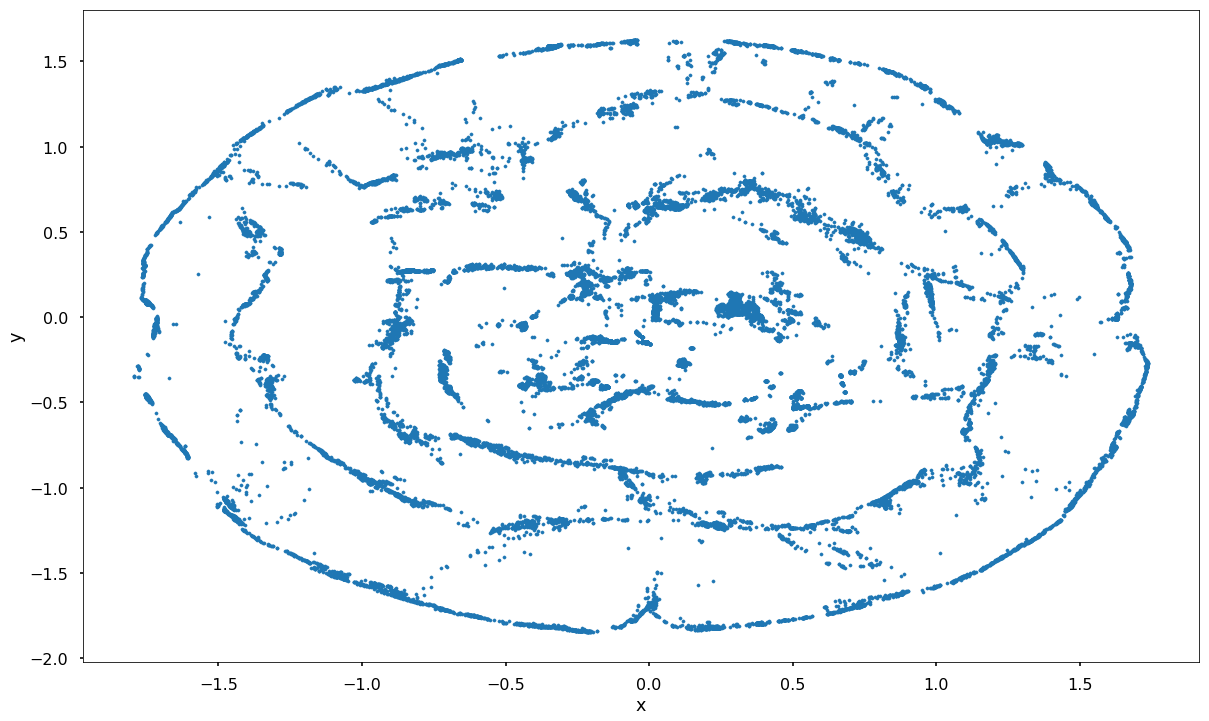

In [123]:
points.plot.scatter('x','y',s=10,figsize=(20,12))

In [124]:
def plot_region(x_bounds, y_bounds):
    
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=30, figsize=(18, 12))
    for i, point in slice.iterrows():
        ax.text(point.x , point.y, point.word, fontsize=11)

In [134]:
def getword(word):
    x = float(points.loc[points['word']==word]['x'].values)
    y = float(points.loc[points['word']==word]['y'].values)
    print(x,y)
    x_min = x - 0.001
    x_max = x + 0.001
    y_min = y - 0.001
    y_max = y + 0.001
    plot_region(x_bounds=(x_min,x_max), y_bounds=(y_min,y_max))
    

-0.15646737813949585 -0.1381131112575531


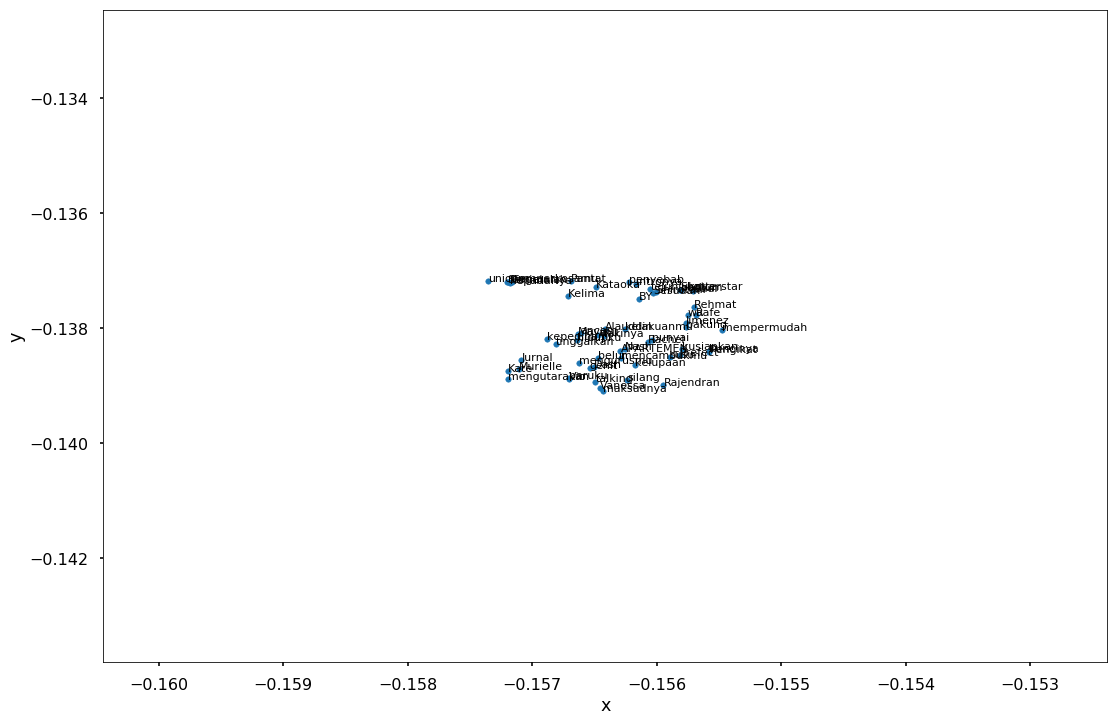

In [136]:
getword('anu')

array([0.72703606])

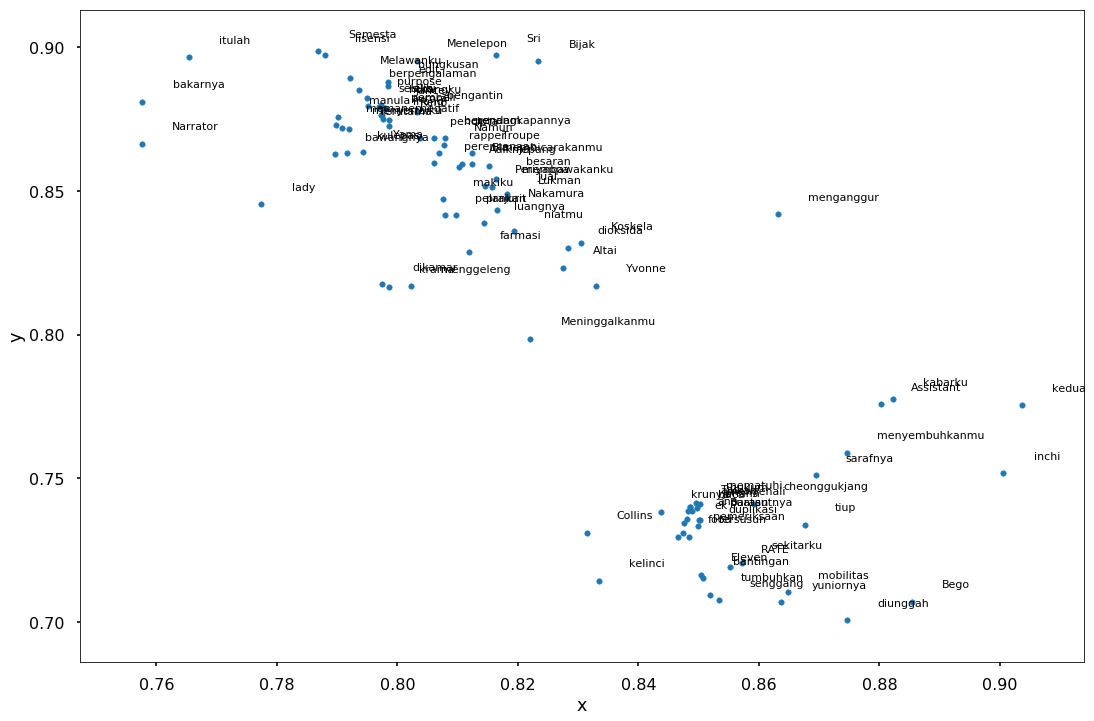

In [38]:
plot_region(x_bounds=(0.7, 1.0), y_bounds=(0.7, 0.9))

In [37]:
slice.head()

AttributeError: type object 'slice' has no attribute 'head'

In [162]:
myvec = tex2vec['']

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word '' not in vocabulary"

In [143]:
myvec = tex2vec.wv.word_vec("anak")

In [152]:
myvec

array([ 2.32726969e-02,  7.13228062e-02,  3.90508294e-01, -4.17248130e-01,
        1.78641841e-01,  1.16005734e-01,  1.94133431e-01,  2.96735495e-01,
        2.89829284e-01, -5.31725287e-01, -3.33103091e-01, -1.98524058e-01,
       -3.80073160e-01, -4.36139822e-01, -5.71847141e-01,  1.27845958e-01,
        2.82954842e-01,  3.30019712e-01, -3.96905951e-02,  1.45153299e-01,
        4.63128537e-01, -4.65585917e-01,  6.44750893e-02, -3.49391520e-01,
       -3.80692601e-01,  4.08453912e-01,  7.46426582e-02, -3.54797125e-01,
        2.87214220e-01, -1.17826961e-01,  4.15081799e-01,  2.49916807e-01,
       -2.55681753e-01, -2.21119493e-01, -4.73009706e-01, -8.87020305e-03,
        3.34769785e-02, -6.25863522e-02, -3.40873212e-01,  5.51490709e-02,
       -3.65537226e-01,  4.35873777e-01, -3.15514475e-01, -1.90766171e-01,
       -4.39447254e-01, -2.99006701e-01,  1.38303369e-01,  2.01171294e-01,
       -1.47241071e-01,  1.46686062e-01,  2.13188857e-01, -2.59011626e-01,
       -4.84646499e-01, -

In [163]:
#cari pake vector yang ada
tex2vec.wv.most_similar(positive=[myvec],topn=1)

[('anak', 1.0000001192092896)]

In [144]:
tex2vec.similar_by_word("subtitle")

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('translate', 0.9905929565429688),
 ('irene', 0.9883977770805359),
 ('english', 0.9866872429847717),
 ('talk', 0.9863124489784241),
 ('dont', 0.9857357740402222),
 ('yts', 0.9840521812438965),
 ('subtitles', 0.9817236661911011),
 ('cheaper', 0.980956494808197),
 ('wants', 0.9808217287063599),
 ('ask', 0.9806349873542786)]

In [42]:
#Hubungan Linear dari sebuah kata

In [41]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = tex2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2


In [42]:
nearest_similarity_cosmul("saya", "kamu", "pergi")

saya is related to kamu, as Yuxuan is related to pergi


C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'Yuxuan'

In [46]:
type(all_word_vector_matrix_2d)

numpy.ndarray

In [47]:
all_word_vector_matrix_2d.tofile("cerpen.fil")

In [48]:
len(all_word_vector_matrix_2d)

6852

In [49]:
all_word_vector_matrix_2d[1]

array([-0.04254838, -0.12791124], dtype=float32)

In [51]:
af = np.fromfile('cerpen.fil')

array([-5.57390906e-10, -5.52423324e-10, -5.27025418e-10, ...,
       -1.20257737e-09,  1.07779051e-03, -5.59426611e-10])